In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

ARIMA(8:2)

In [3]:
data = pd.read_csv('HaNoi.csv')

# Chuyển đổi cột 'date' thành định dạng thời gian
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data = data.loc[(data['date'] >= '2019-01-03') & (data['date'] <= '2024-01-03')]
data['date'] = data['date'].dt.strftime('%d-%m-%Y')
data

,Index,date,pm25,pm10,o3,no2,so2,co,AQI
1060,1060,01-10-2019,150,64,20,14,16,9,150
1061,1061,10-10-2019,109,35,15,10,16,6,109
1062,1062,11-10-2019,56,36,15,10,16,5,56
1063,1063,12-10-2019,61,36,15,8,16,4,61
1064,1064,13-10-2019,67,29,18,5,16,2,67
...,...,...,...,...,...,...,...,...,...
2697,2697,08-09-2023,59,49,12,23,20,7,59
2698,2698,09-09-2023,70,59,12,22,19,6,70
2699,2699,01-01-2024,140,65,13,27,24,8,140
2708,2708,02-01-2024,98,52,11,21,23,7,98


In [4]:
train_size = int(0.8*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12589.206, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12529.609, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12478.490, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12587.212, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12329.106, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12329.695, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12329.627, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12362.821, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12472.376, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12327.170, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12476.490, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12527.611, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=12327.761, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]  

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))

In [6]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[ 98.59219727 113.2876127  120.84055565 124.72251104 126.71770388
 127.74316503 128.27021713 128.54110396 128.68033056 128.75188829
 128.78866653 128.80756929 128.81728466 128.82227803 128.82484446
 128.82616351 128.82684146 128.8271899  128.82736899 128.82746103
 128.82750834 128.82753266 128.82754515 128.82755158 128.82755488
 128.82755657 128.82755745 128.82755789 128.82755813 128.82755824]
Predicted closing prices for the next 60 days:
[ 98.59219727 113.2876127  120.84055565 124.72251104 126.71770388
 127.74316503 128.27021713 128.54110396 128.68033056 128.75188829
 128.78866653 128.80756929 128.81728466 128.82227803 128.82484446
 128.82616351 128.82684146 128.8271899  128.82736899 128.82746103
 128.82750834 128.82753266 128.82754515 128.82755158 128.82755488
 128.82755657 128.82755745 128.82755789 128.82755813 128.82755824
 128.8275583  128.82755834 128.82755835 128.82755836 128.82755836
 128.82755837 128.82755837 128.82755837 128.827

In [7]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 54.442851236586215
MAE: 48.373946903507644
MAPE: 77.00267192070159


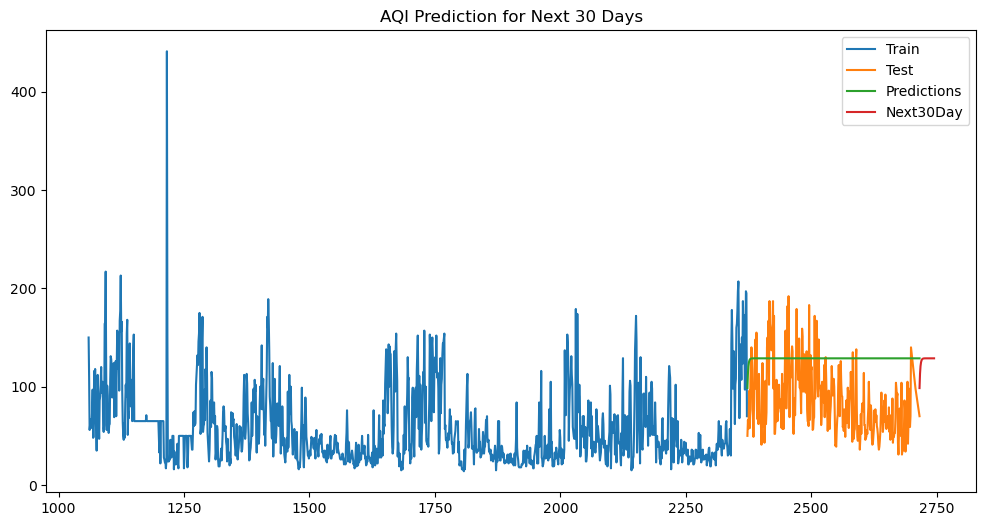

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

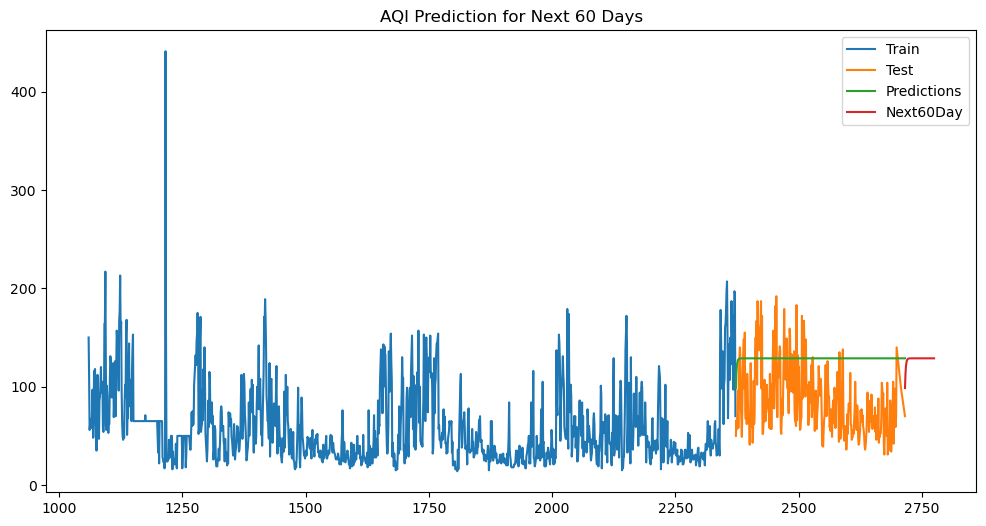

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

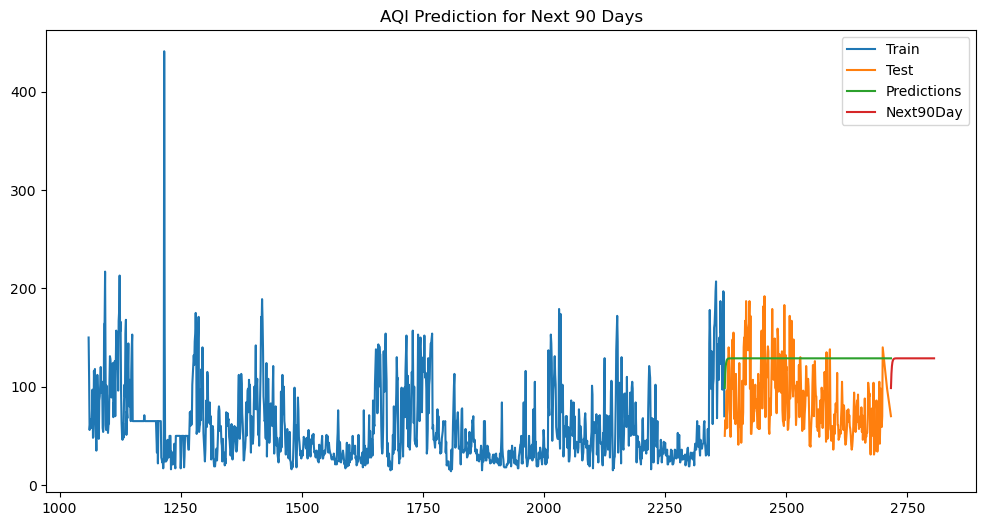

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(7:3)

In [11]:
train_size = int(0.7*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11061.897, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11001.946, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10955.601, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11059.908, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10820.727, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10822.580, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10822.573, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10858.355, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10955.990, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10818.848, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10953.623, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10999.960, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10820.698, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]  

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[46.98814964 48.01913087 48.55375978 48.83099866 48.97476453 49.04931622
 49.08797599 49.10802352 49.11841943 49.12381037 49.12660591 49.12805557
 49.12880731 49.12919714 49.12939929 49.12950412 49.12955848 49.12958667
 49.12960128 49.12960886 49.12961279 49.12961483 49.12961589 49.12961644
 49.12961672 49.12961687 49.12961695 49.12961699 49.12961701 49.12961702]
Predicted closing prices for the next 60 days:
[46.98814964 48.01913087 48.55375978 48.83099866 48.97476453 49.04931622
 49.08797599 49.10802352 49.11841943 49.12381037 49.12660591 49.12805557
 49.12880731 49.12919714 49.12939929 49.12950412 49.12955848 49.12958667
 49.12960128 49.12960886 49.12961279 49.12961483 49.12961589 49.12961644
 49.12961672 49.12961687 49.12961695 49.12961699 49.12961701 49.12961702
 49.12961702 49.12961703 49.12961703 49.12961703 49.12961703 49.12961703
 49.12961703 49.12961703 49.12961703 49.12961703 49.12961703 49.12961703
 49.12961703 49.12961703 49.1

In [13]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 49.3204037325772
MAE: 36.27774511238658
MAPE: 43.87333087826027


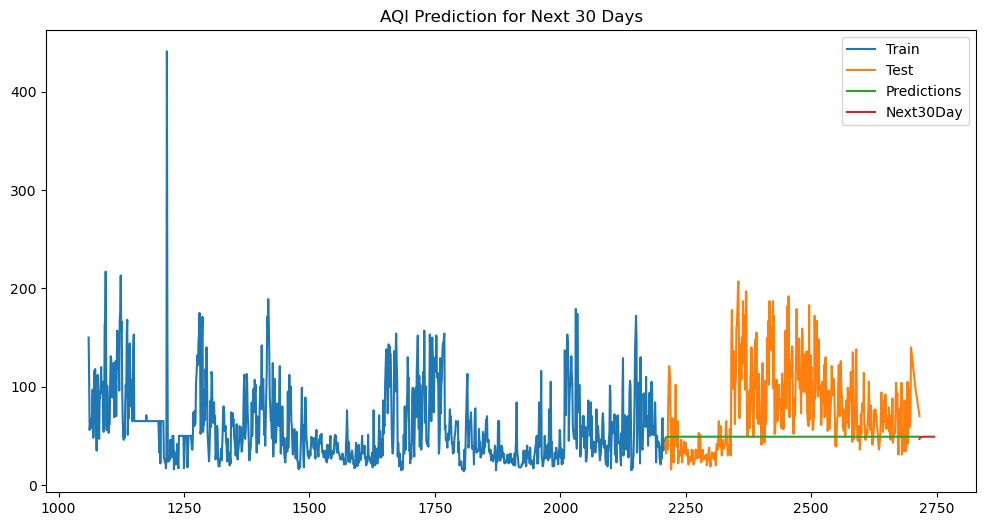

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

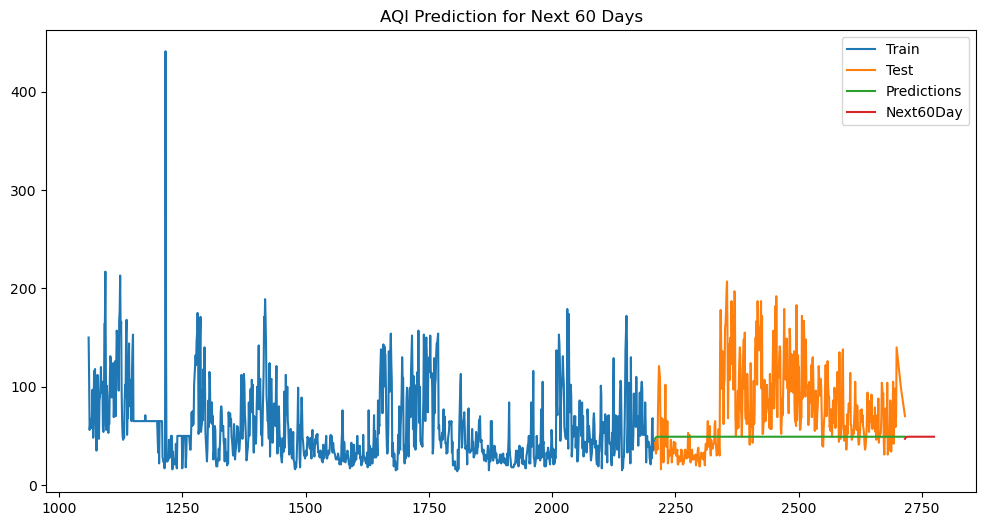

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

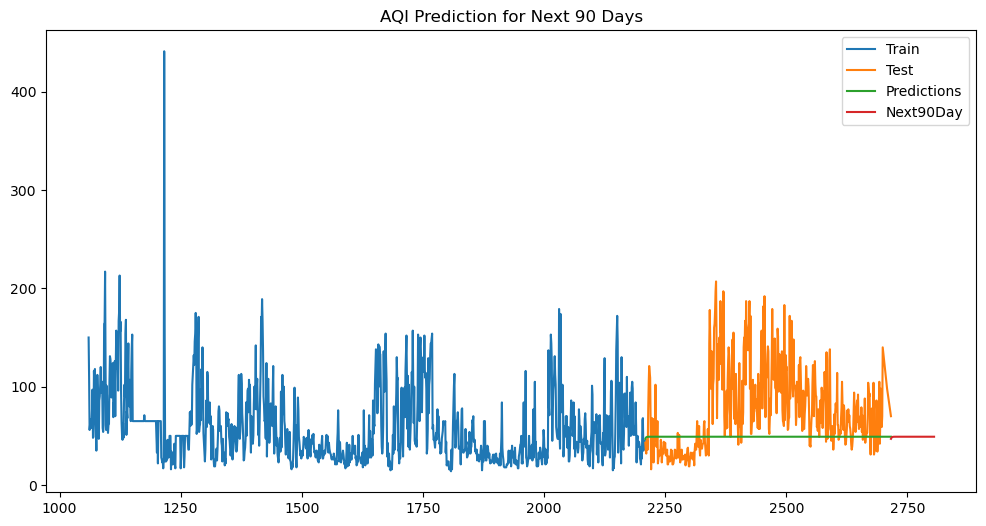

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

ARIMA(9:1)

In [17]:
train_size = int(0.9*len(data))
test_size = len(data)-train_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Qua trinh training
x_train = np.array(train_data.index).reshape(-1,1)
y_train = np.array(train_data['AQI'])
#tim ra mo hinh ARIMA tot nhat
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13976.338, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14289.219, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14195.064, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14128.735, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14287.225, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13978.214, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13978.215, Time=0.68 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13977.261, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13977.346, Time=1.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13976.370, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13980.212, Time=1.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13980.209, Time=0.87 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13976.560, Time=2.75 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13974.338, Time=0.53 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['AQI'])
y_pred = model.predict(n_periods=len(y_test))
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[78.84934965 80.85693539 85.72704663 92.11405223 86.77982227 91.50852272
 92.7321044  87.64032061 93.63926167 91.15240286 88.67020009 94.41052795
 89.43897565 90.2932615  94.06390096 88.34291726 92.0770056  92.83472897
 88.19771512 93.47180918 91.16921004 88.9939125  94.06969667 89.61452417
 90.42559963 93.73431181 88.64825502 92.00737601 92.62820772 88.53484228]
Predicted closing prices for the next 60 days:
[78.84934965 80.85693539 85.72704663 92.11405223 86.77982227 91.50852272
 92.7321044  87.64032061 93.63926167 91.15240286 88.67020009 94.41052795
 89.43897565 90.2932615  94.06390096 88.34291726 92.0770056  92.83472897
 88.19771512 93.47180918 91.16921004 88.9939125  94.06969667 89.61452417
 90.42559963 93.73431181 88.64825502 92.00737601 92.62820772 88.53484228
 93.23718796 91.14387284 89.25659001 93.75382621 89.76720717 90.53674057
 93.44069788 88.92035789 91.94179736 92.4469378  88.83418212 93.02630831
 91.12442982 89.48822733 93.4

In [19]:
# Tính RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

RMSE: 31.086510893923837
MAE: 26.742659545678542
MAPE: 49.1034131431326


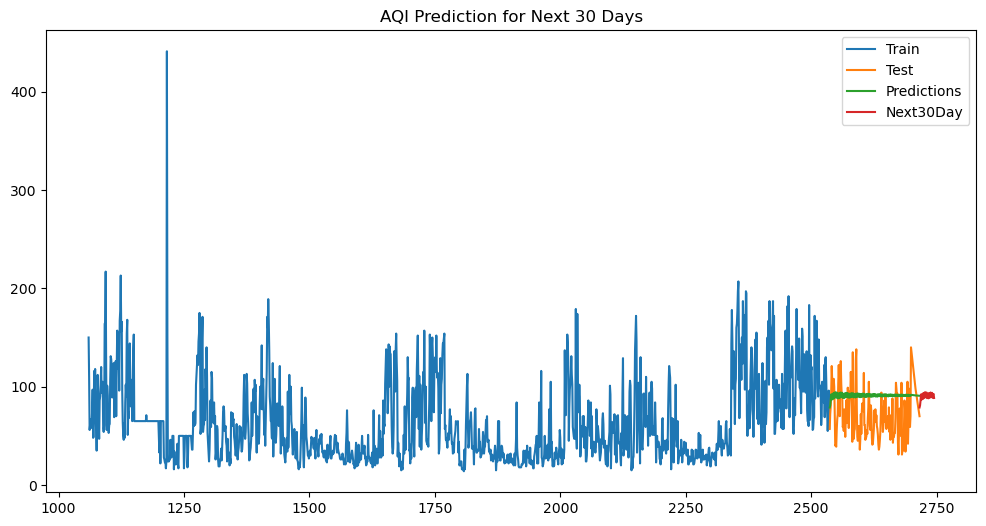

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.title('AQI Prediction for Next 30 Days')
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

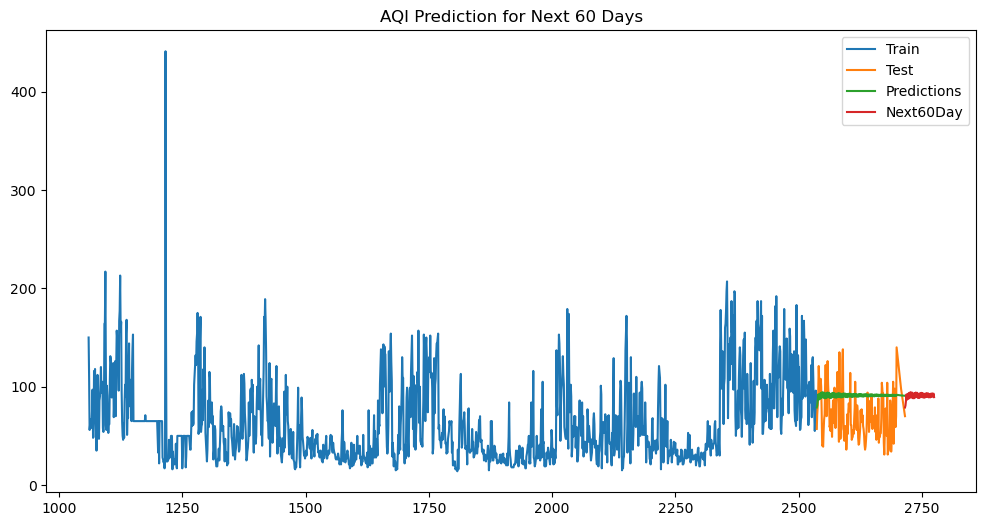

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60, y_next_60_days)
plt.title('AQI Prediction for Next 60 Days')
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

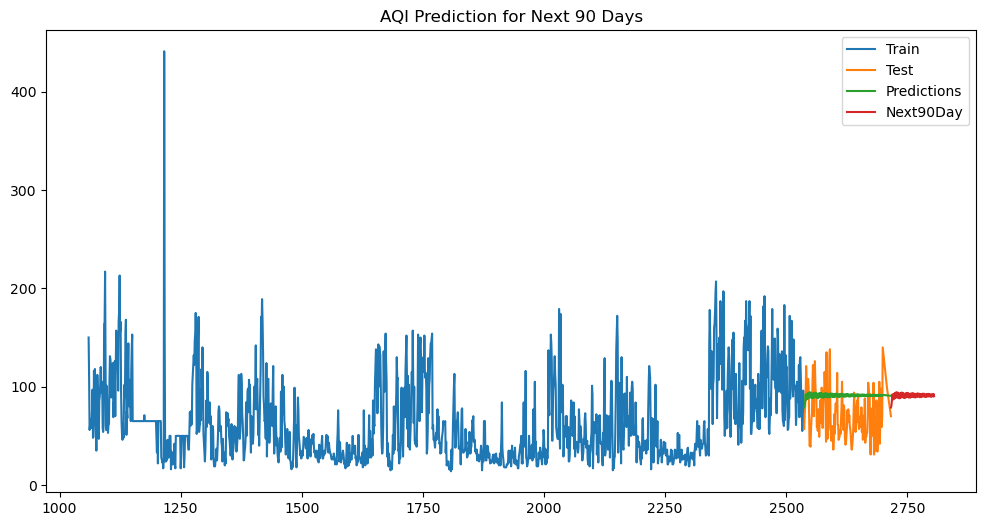

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90, y_next_90_days)
plt.title('AQI Prediction for Next 90 Days')
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()